In [1]:
# Python Library and modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, 
                             precision_score, recall_score)
import torch
import torch.nn as nn
import torch.optim as optim

# Self Modules
from model import AlexNet, evaluate
from preprocess import preprocess

### Create the model

In [2]:
model = AlexNet(5)

### Preprocess the Data

In [3]:
train_dataloader, val_dataloader ,test_dataloader = preprocess()

### Training Loop

In [4]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

train_acc = []
val_acc = []
# Training loop
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    train_total = 0
    train_correct = 0
    for images, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = outputs.max(1)
        train_total += labels.size(0)
        train_correct += labels.eq(predicted).sum().item()
    
    running_accuracy = 100* train_correct/train_total
    train_acc.append(running_accuracy)
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_dataloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Validation Loss: {val_loss/len(val_dataloader):.4f}")
    print("Train Accuracy",train_acc[-1])
    val_acc.append(100*correct/total)

Epoch [1/15] - Validation Loss: 1.2565
Train Accuracy 28.9
Epoch [2/15] - Validation Loss: 1.2912
Train Accuracy 46.8
Epoch [3/15] - Validation Loss: 1.1412
Train Accuracy 48.6
Epoch [4/15] - Validation Loss: 0.9624
Train Accuracy 56.45
Epoch [5/15] - Validation Loss: 0.9541
Train Accuracy 59.15
Epoch [6/15] - Validation Loss: 0.8046
Train Accuracy 68.15
Epoch [7/15] - Validation Loss: 0.7979
Train Accuracy 71.55
Epoch [8/15] - Validation Loss: 0.7909
Train Accuracy 72.75
Epoch [9/15] - Validation Loss: 1.1777
Train Accuracy 75.7
Epoch [10/15] - Validation Loss: 0.7067
Train Accuracy 76.15
Epoch [11/15] - Validation Loss: 0.8158
Train Accuracy 78.8
Epoch [12/15] - Validation Loss: 0.6747
Train Accuracy 79.65
Epoch [13/15] - Validation Loss: 0.6860
Train Accuracy 83.15
Epoch [14/15] - Validation Loss: 0.8184
Train Accuracy 83.9
Epoch [15/15] - Validation Loss: 0.9024
Train Accuracy 85.9


### Learning Visualizations

#### Training Accuracy

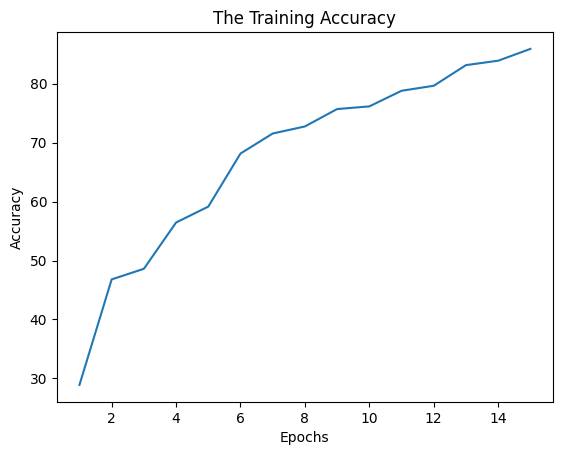

In [5]:
epochs=[i+1 for i in range(15)]

plt.plot(epochs, train_acc)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('The Training Accuracy')

# Show the plot
plt.show()

#### Validation Accuracy

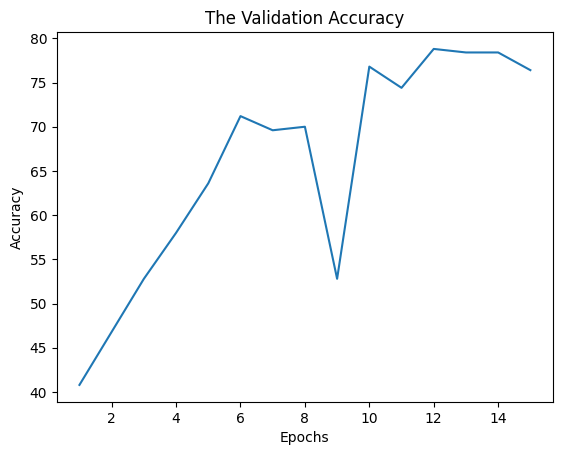

In [6]:
epochs=[i+1 for i in range(15)]

plt.plot(epochs, val_acc)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('The Validation Accuracy')

# Show the plot
plt.show()

### Save the model

In [7]:
torch.save(model,'./model/trained_model.pth')

### Load the model

In [8]:
# Load the saved model
loaded_model = torch.load('./model/trained_model.pth')
loaded_model.eval()  # Set the model to evaluation mode if needed

AlexNet(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (relu1): ReLU()
  (response_Norm1): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
  (max_pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (relu2): ReLU()
  (response_Norm2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
  (max_pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (relu3): ReLU()
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (relu4): ReLU()
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (relu5): ReLU()
  (response_Norm3): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
  (max_pool3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc

#### Model Evaluation

##### The original model

In [9]:
trues, preds = evaluate(test_dataloader, model, criterion)

In [10]:
print("The accuracy is: ", accuracy_score(trues, preds))

The accuracy is:  1.0


In [11]:
print("The precision is: ", precision_score(trues, preds, average=None))

The precision is:  [1. 1. 1. 1. 1.]


In [12]:
print("The recall score is: ", recall_score(trues, preds, average=None))

The recall score is:  [1. 1. 1. 1. 1.]


In [13]:
print("The F1 score is ", f1_score(trues, preds, average=None))

The F1 score is  [1. 1. 1. 1. 1.]


<Axes: >

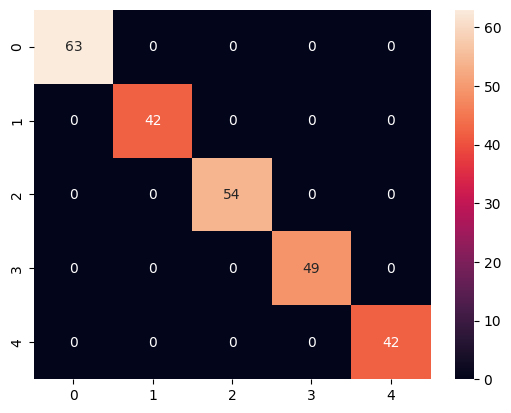

In [14]:
sns.heatmap(confusion_matrix(trues, preds), annot=True)

#### The loaded model

In [15]:
trues, preds = evaluate(test_dataloader, loaded_model, criterion)

In [16]:
print("The accuracy is: ", accuracy_score(trues, preds))

The accuracy is:  1.0


In [17]:
print("The precision is: ", precision_score(trues, preds,average=None))

The precision is:  [1. 1. 1. 1. 1.]


In [18]:
print("The recall score is: ", recall_score(trues, preds,average=None))

The recall score is:  [1. 1. 1. 1. 1.]


In [19]:
print("The F1 score is ", f1_score(trues, preds, average=None))

The F1 score is  [1. 1. 1. 1. 1.]


<Axes: >

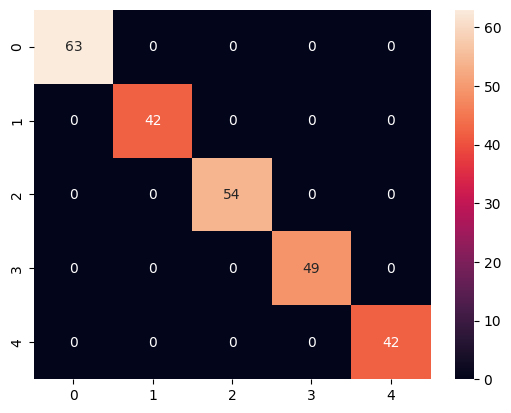

In [20]:
sns.heatmap(confusion_matrix(trues, preds), annot=True)